#Top Indian Places to Visit

In [1]:
# help to mount gdrive with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import all Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

### **Import Travel Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Travel/top_indian_places_to_visit.csv')
df

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,None,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,None,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,None,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,None,Scientific,Yes,0.31,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,Western,Gujarat,Gandhinagar,Akshardham,Temple,1992,3.0,4.6,0,Yes,Monday,Religious,No,0.18,All
321,321,Central,Uttar Pradesh,Agra,Agra Fort,Fort,1565,2.0,4.5,40,Yes,None,Historical,Yes,1.30,Afternoon
322,322,Central,Madhya Pradesh,Bhopal,Madhya Pradesh Tribal Museum,Museum,2013,2.0,4.7,10,Yes,Monday,Cultural,Yes,0.15,All
323,323,Northern,Rajasthan,Jaipur,City Palace,Palace,1727,2.0,4.4,200,Yes,None,Historical,Yes,0.51,Morning


## **Some Imp Graphical Data Representation**

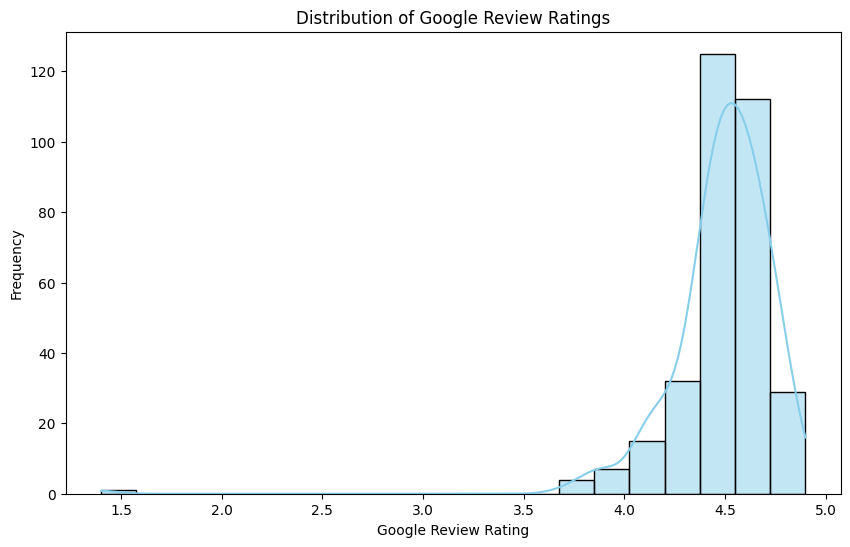

In [4]:
# Distribution of Google review ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Google review rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Google Review Ratings')
plt.xlabel('Google Review Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-5-7264f19cd147>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zone', y='Google review rating', data=df, palette='Set3')


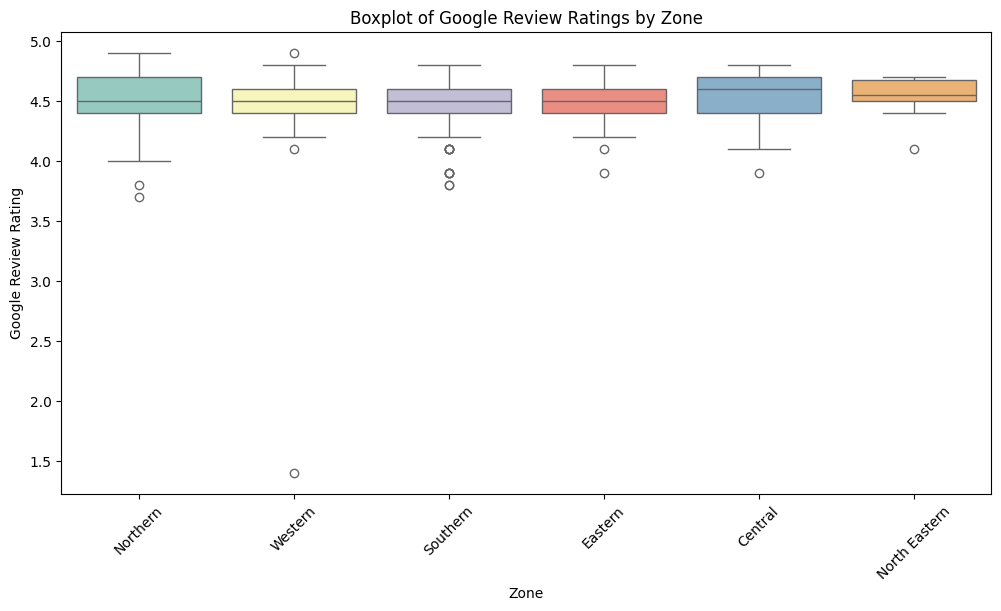

In [5]:
# Boxplot of Google review ratings by Zone
plt.figure(figsize=(12, 6))
sns.boxplot(x='Zone', y='Google review rating', data=df, palette='Set3')
plt.title('Boxplot of Google Review Ratings by Zone')
plt.xlabel('Zone')
plt.ylabel('Google Review Rating')
plt.xticks(rotation=45)
plt.show()

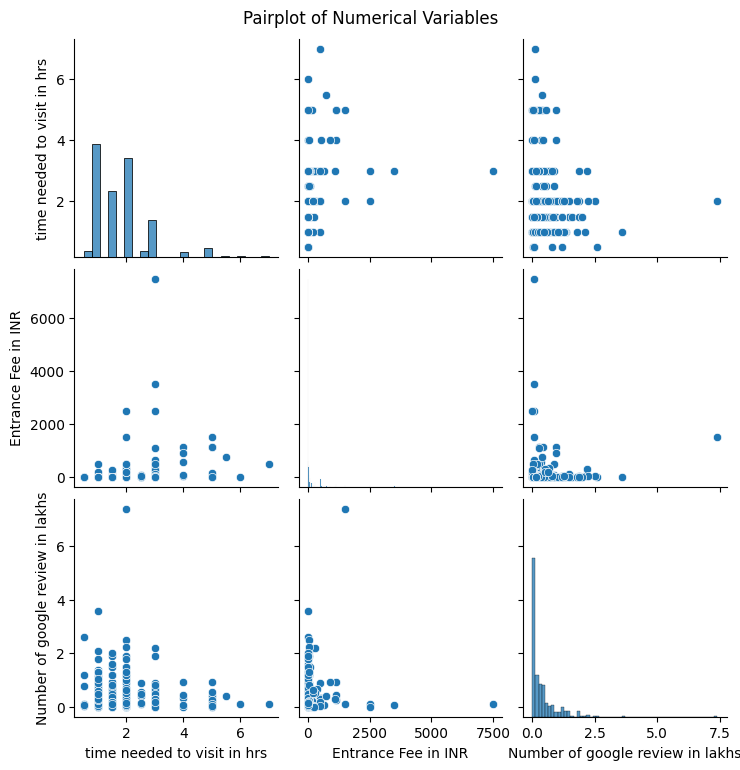

In [6]:
# Pairplot to visualize relationships between numerical variables
numerical_cols = ['time needed to visit in hrs', 'Entrance Fee in INR', 'Number of google review in lakhs']
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

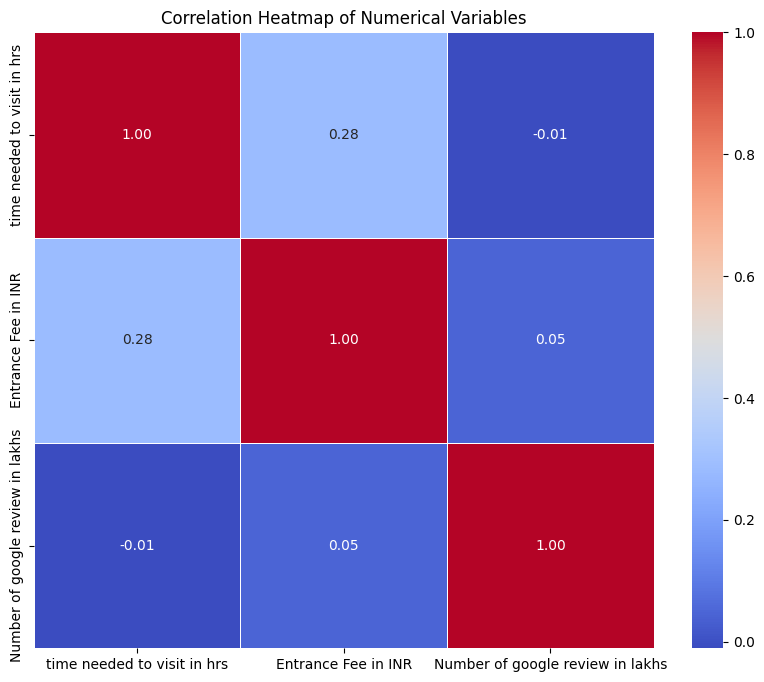

In [7]:
# Correlation heatmap of numerical variables
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [8]:
# remove all rows which contain NaN value
df.dropna(inplace=True)

### **Encode all string value**

In [9]:
df_encoded = pd.get_dummies(df, columns=['Zone', 'State', 'City', 'Name', 'Type', 'Establishment Year',
                                         'Weekly Off', 'Significance', 'Best Time to visit',
                                         'Airport with 50km Radius', 'DSLR Allowed'])

df_encoded.head(5)

,Unnamed: 0,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs,Zone_Central,Zone_Eastern,Zone_North Eastern,Zone_Northern,Zone_Southern,...,Best Time to visit_All,Best Time to visit_All,Best Time to visit_Anytime,Best Time to visit_Evening,Best Time to visit_Morning,Best Time to visit_Night,Airport with 50km Radius_No,Airport with 50km Radius_Yes,DSLR Allowed_No,DSLR Allowed_Yes
0,0,0.5,4.6,0,2.60,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,1,2.0,4.5,30,0.40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,2,5.0,4.6,60,0.40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,3,2.0,4.1,50,0.27,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,4,2.0,4.2,15,0.31,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1


### **Interpret user input and provide predictive analysis.**

In [10]:
# user input for finding prediction
zone = input('Zone: ')
state = input('State: ')
city = input('City: ')
name = input('Name: ')
type_travel = input('Type: ')
establishment_year = input('Establishment Year: ')
time_needed_to_visit_in_hrs = float(input('Time needed to visit (in hrs): '))
entrance_fee = float(input('Entrance Fee (in INR): '))
airport = input('Airport with 50km Radius (Yes or No): ')
weekoff = input('Weekly Off (if not - None): ')
significance = input('Significance: ')
dslr_allowed = input('DSLR Allowed (Yes or No): ')
no_of_google_review_in_lakh = float(input('Number of google review in lakhs (input `1` mean `1 lakh`): '))
best_time_to_visit = input('Best time to visit (ex. Evening, Morning, Afternoon, Night, All): ')

Zone: Eastern
State: West Bengal
City: kolkata
Name: Victoria
Type: Historical
Establishment Year: 1200
Time needed to visit (in hrs): 5
Entrance Fee (in INR): 0
Airport with 50km Radius (Yes or No): Yes
Weekly Off (if not - None): None
Significance: Palace
DSLR Allowed (Yes or No): Yes
Number of google review in lakhs (input `1` mean `1 lakh`): 2
Best time to visit (ex. Evening, Morning, Afternoon, Night, All): Evening


In [11]:
# Example prediction
user_data = {
    'Zone': [zone],
    'State': [state],
    'City': [city],
    'Name': [name],
    'Type': [type_travel],
    'Establishment Year': [establishment_year],
    'time needed to visit in hrs': [time_needed_to_visit_in_hrs],
    'Entrance Fee in INR': [entrance_fee],
    'Airport with 50km Radius': [airport],
    'Weekly Off': [weekoff],
    'Significance': [significance],
    'DSLR Allowed': [dslr_allowed],
    'Number of google review in lakhs': [no_of_google_review_in_lakh],  # Assuming it has 1.1 lakh reviews
    'Best Time to visit': [best_time_to_visit]
}

user_data

{'Zone': ['Eastern'],
 'State': ['West Bengal'],
 'City': ['kolkata'],
 'Name': ['Victoria'],
 'Type': ['Historical'],
 'Establishment Year': ['1200'],
 'time needed to visit in hrs': [5.0],
 'Entrance Fee in INR': [0.0],
 'Airport with 50km Radius': ['Yes'],
 'Weekly Off': ['None'],
 'Significance': ['Palace'],
 'DSLR Allowed': ['Yes'],
 'Number of google review in lakhs': [2.0],
 'Best Time to visit': ['Evening']}

#### *or continue with this example data*

In [12]:
# Example prediction
example_data = {
    'Zone': ['Northern'],
    'State': ['Delhi'],
    'City': ['New Delhi'],
    'Name': ['India Gate'],
    'Type': ['War Memorial'],
    'Establishment Year': ['1931'],
    'time needed to visit in hrs': [2],
    'Entrance Fee in INR': [0],  # Assuming it's free
    'Airport with 50km Radius': ['Yes'],
    'Weekly Off': ['None'],
    'Significance': ['Historical'],
    'DSLR Allowed': ['Yes'],
    'Number of google review in lakhs': [1.1],  # Assuming it has 1.1 lakh reviews
    'Best Time to visit': ['Evening']
}

In [13]:
user_df = pd.DataFrame(user_data) # if you want to continue with example_data please change user_data to example_data
user_df

,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,Eastern,West Bengal,kolkata,Victoria,Historical,1200,5.0,0.0,Yes,None,Palace,Yes,2.0,Evening


### **Divide the original data into training and testing sets**

In [14]:
# Splitting the data into train and test sets
X = df_encoded.drop(['Unnamed: 0','Google review rating'], axis=1)
y = df_encoded['Google review rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,time needed to visit in hrs,Entrance Fee in INR,Number of google review in lakhs,Zone_Central,Zone_Eastern,Zone_North Eastern,Zone_Northern,Zone_Southern,Zone_Western,State_Andaman and Nicobar Islands,...,Best Time to visit_All,Best Time to visit_All,Best Time to visit_Anytime,Best Time to visit_Evening,Best Time to visit_Morning,Best Time to visit_Night,Airport with 50km Radius_No,Airport with 50km Radius_Yes,DSLR Allowed_No,DSLR Allowed_Yes
172,1.5,15,0.550,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
183,1.5,50,0.450,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
17,1.0,0,3.600,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
24,5.0,1149,0.270,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
132,2.0,0,0.065,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1.5,15,0.250,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
71,2.0,0,0.390,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
106,2.0,0,0.680,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
270,1.0,50,0.100,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [16]:
X_test

,time needed to visit in hrs,Entrance Fee in INR,Number of google review in lakhs,Zone_Central,Zone_Eastern,Zone_North Eastern,Zone_Northern,Zone_Southern,Zone_Western,State_Andaman and Nicobar Islands,...,Best Time to visit_All,Best Time to visit_All,Best Time to visit_Anytime,Best Time to visit_Evening,Best Time to visit_Morning,Best Time to visit_Night,Airport with 50km Radius_No,Airport with 50km Radius_Yes,DSLR Allowed_No,DSLR Allowed_Yes
234,1.5,0,0.014,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
110,5.5,750,0.410,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
248,1.0,0,0.440,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
9,2.0,0,0.160,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
93,1.0,0,0.300,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2.0,10,0.150,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
232,1.0,0,0.010,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
60,2.0,0,0.100,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
124,3.0,30,0.210,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [17]:
y_train

172    4.2
183    4.4
17     4.6
24     4.3
132    4.6
      ... 
188    4.4
71     4.8
106    4.4
270    4.8
102    4.3
Name: Google review rating, Length: 260, dtype: float64

In [18]:
y_test

234    4.2
110    4.6
248    4.7
9      4.6
93     4.8
      ... 
322    4.7
232    4.6
60     4.6
124    4.6
221    4.6
Name: Google review rating, Length: 65, dtype: float64

## **Linear Regression**

### **Create Linear Regression Model**

In [19]:
# Machine Learning Regression Model - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predicting on test set
y_pred = model.predict(X_test)

In [21]:
print(len(y_pred))

65


In [22]:
y_pred

array([4.31982366, 3.94080009, 4.73574415, 4.30329353, 4.67368063,
       4.48700284, 4.28888394, 4.72141566, 4.70337705, 4.3097473 ,
       4.54216241, 4.19603859, 3.80536547, 4.58673252, 4.83339593,
       4.56938587, 4.75848332, 4.41113565, 4.49943396, 4.33102718,
       4.29613669, 4.67643623, 4.67523722, 4.2514808 , 4.63537546,
       4.04938073, 4.52896898, 4.36815791, 4.45463081, 4.70094269,
       4.13033575, 4.6831908 , 4.57098669, 4.40100695, 4.49604467,
       4.26246027, 4.22319979, 4.4364865 , 4.7877281 , 4.29880886,
       4.19409421, 4.42289323, 4.74538316, 4.37666859, 4.68309954,
       4.58746577, 4.64099933, 3.95202039, 4.37286806, 4.48118066,
       4.39346153, 4.47587071, 4.42139216, 4.62349921, 4.26795767,
       4.28704121, 4.42273353, 4.20342667, 4.05469296, 4.42601873,
       3.81731436, 4.68110263, 4.43918743, 4.36105122, 4.80553229])

### **Find Error % for Linear Regression**

In [23]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Squared Error %:", mse*100)

Mean Squared Error: 0.08641628305593259
Mean Squared Error %: 8.641628305593258


### **Generate predictions based on user-provided data based on Linear Regression**

In [24]:
user_df_encoded = pd.get_dummies(user_df, columns=['Zone', 'State', 'City', 'Name', 'Type',
                                                         'Establishment Year', 'Weekly Off',
                                                         'Significance', 'Best Time to visit',
                                                         'Airport with 50km Radius', 'DSLR Allowed'])

In [25]:
# Ensure that the columns in the example data match the columns used during model training
# If there are missing columns, add them and fill with zeros
missing_cols = list(set(X_train.columns) - set(user_df_encoded.columns))
if missing_cols:
    user_df_encoded = pd.concat([user_df_encoded, pd.DataFrame(0, index=user_df_encoded.index, columns=missing_cols)], axis=1)

In [26]:
# Ensure the order of columns is the same as in the training data
user_df_encoded = user_df_encoded.reindex(columns=X_train.columns, fill_value=0)

In [27]:
# Predict the Google Review Rating
predicted_rating = model.predict(user_df_encoded)
print("Predicted Google Review Rating:", predicted_rating[0])

Predicted Google Review Rating: 4.30426171211299


## **SVR (Support Vector Regression)**

### **Create SVR**

In [28]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [29]:
y_pred_svr = svr_model.predict(X_test)

In [30]:
print(len(y_pred_svr))

65


In [31]:
y_pred_svr

array([4.25641739, 3.8964311 , 4.71014211, 4.33878828, 4.72949875,
       4.4542538 , 4.28778821, 4.6547078 , 4.68139854, 4.25230704,
       4.45202625, 4.24856937, 3.83029121, 4.52997019, 4.59583876,
       4.54599755, 4.69053191, 4.42577506, 4.49015599, 4.29826526,
       4.30742056, 4.65523119, 4.6728225 , 4.29445391, 4.70619948,
       4.02449562, 4.48978019, 4.32918573, 4.46976372, 4.6834608 ,
       4.02917139, 4.72132021, 4.5566408 , 4.43975546, 4.47798164,
       4.29281656, 4.19743061, 4.41701193, 4.72261186, 4.22279974,
       4.12349923, 4.36963125, 4.73370366, 4.33272504, 4.67617476,
       4.56997059, 4.67494633, 3.93041996, 4.41840375, 4.52708966,
       4.29083991, 4.49132309, 4.43216185, 4.59954266, 4.07227633,
       4.28516133, 4.40602292, 4.20040391, 4.12315737, 4.27352756,
       3.7748606 , 4.64627013, 4.44756825, 4.24509588, 4.76137923])

### **Find Error % for SVR**

In [32]:
# Model evaluation for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR Mean Squared Error:", mse_svr)
print("SVR Mean Squared Error %:", mse_svr*100)

SVR Mean Squared Error: 0.08926601799430296
SVR Mean Squared Error %: 8.926601799430296


### **Generate predictions based on user-provided data based on SVR**

In [33]:
predicted_rating_svr = svr_model.predict(user_df_encoded)
print("Predicted Google Review Rating using SVR:", predicted_rating_svr[0])

Predicted Google Review Rating using SVR: 4.348873278579976


## **Random Forest Regressor**

### **Create Random Forest Regressor**

In [46]:
# Machine Learning Regression Model - Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

In [48]:
print(len(y_pred_rf))

65


In [49]:
y_pred_rf

array([4.408, 4.192, 4.702, 4.417, 4.574, 4.46 , 4.402, 4.688, 4.616,
       4.463, 4.529, 4.189, 4.247, 4.485, 4.671, 4.515, 4.545, 4.437,
       4.403, 4.458, 4.447, 4.731, 4.686, 4.362, 4.581, 4.186, 4.504,
       4.405, 4.466, 4.669, 4.401, 4.562, 4.518, 4.381, 4.437, 4.404,
       4.406, 4.482, 4.725, 4.405, 4.377, 4.518, 4.692, 4.55 , 4.69 ,
       4.494, 4.696, 4.231, 4.486, 4.479, 4.492, 4.489, 4.489, 4.539,
       4.442, 4.285, 4.489, 4.368, 4.394, 4.459, 4.201, 4.631, 4.452,
       4.457, 4.566])

### **Find Error % for Random Forest Regressor**

In [50]:
# Model evaluation for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Mean Squared Error %:", mse_rf*100)

Random Forest Mean Squared Error: 0.05629946153846153
Random Forest Mean Squared Error %: 5.629946153846153


### **Generate predictions based on user-provided data based on Random Forest Regressor**

In [51]:
# Predict the Google Review Rating for the example data using Random Forest Regression
predicted_rating_rf = rf_model.predict(user_df_encoded)
print("Predicted Google Review Rating using Random Forest:", predicted_rating_rf[0])

Predicted Google Review Rating using Random Forest: 4.561000000000002


## **Graphical representation for Error**

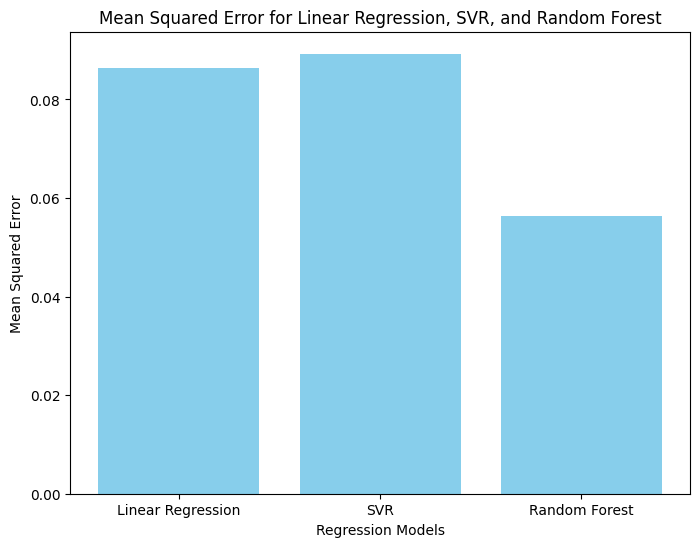

In [52]:
# Define model names and their corresponding mean squared errors
models = ['Linear Regression', 'SVR', 'Random Forest']
mse_values = [mse, mse_svr, mse_rf]  # Assuming these variables are defined from your previous code

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error for Linear Regression, SVR, and Random Forest')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()